This notebook shows an example of the data that's tracked and some visualizations that can be made. 

# Setup

In [1]:
from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

# Some setup
plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames(testing=True) # would want to get rid of testing=True for others

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards
1047,1048,2021-07-02 14:52:37.299000,4,478.930,event_only_hoverboard_0207_to_0507_2021,True,3,Infallible Laughing Penguin,1,20:00:36.229,915,0,1,39.0
1048,1049,2021-07-02 15:01:32.442000,4,502.806,event_only_hoverboard_0207_to_0507_2021,True,3,Infallible Laughing Penguin,1,20:09:55.248,915,0,1,39.0
1049,1050,2021-07-02 15:10:47.299000,4,521.357,event_only_hoverboard_0207_to_0507_2021,True,3,Infallible Laughing Penguin,1,20:19:28.656,915,0,1,39.0
1050,1051,2021-07-02 22:04:26.614000,4,464.358,event_only_hoverboard_0207_to_0507_2021,True,3,Infallible Laughing Penguin,1,03:12:10.972,915,0,1,39.0
1051,1052,2021-07-05 06:08:59.893000,4,527.573,event_only_hoverboard_0207_to_0507_2021,True,3,Infallible Laughing Penguin,1,11:17:47.466,180,0,0,39.0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
3359,1049,2,round_hoverboardsurvival_final,89.869,102.568,True,7,760,0,0.0,35,0,gold,16,100,12.0,NaN,12.0,True,43.75
3360,1050,0,round_hoverboardsurvival_event_only,102.618,136.609,True,15,30,0,0.0,35,0,gold,30,100,18.0,NaN,18.0,False,50.00
3361,1050,1,round_hoverboardsurvival_event_only,94.148,98.367,True,10,20,0,0.0,35,0,gold,17,100,11.0,NaN,11.0,False,58.82
3362,1050,2,round_hoverboardsurvival_final,85.784,94.202,True,4,760,0,0.0,35,0,gold,11,100,9.0,NaN,9.0,True,36.36
3363,1051,0,round_hoverboardsurvival_event_only,85.602,98.37,True,3,30,0,0.0,35,0,gold,30,100,18.0,NaN,18.0,False,10.00
3364,1051,1,round_hoverboardsurvival_event_only,94.184,94.309,True,7,20,0,0.0,35,0,gold,17,100,8.0,NaN,8.0,False,41.18
3365,1051,2,round_hoverboardsurvival_final,87.902,87.903,True,7,760,0,0.0,35,0,gold,8,100,7.0,NaN,7.0,True,87.50
3366,1052,0,round_hoverboardsurvival_event_only,89.897,102.699,True,4,30,0,0.0,35,0,gold,30,100,0.0,NaN,8.0,False,13.33
3367,1052,1,round_hoverboardsurvival_event_only,89.832,136.784,True,4,20,0,0.0,35,0,gold,8,100,8.0,NaN,5.0,False,50.00
3368,1052,2,round_hoverboardsurvival_final,89.219,82.953,False,2,60,0,3.0,0,0,NaN,5,0,5.0,NaN,1.0,False,40.00


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,126,113,89.682540,8.642857,7.619469,38.146195,41.268097,14.903,41.276044,7735,1740,61.388889,13.809524,NaN,113,0,0,0.309524
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,126,117,92.857143,12.301587,11.239316,37.730769,36.664034,21.536,36.679325,7875,474,62.500000,3.761905,NaN,117,0,0,0.214286
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,117,109,93.162393,10.666667,9.880734,42.253853,34.610505,22.642,34.633486,6155,306,52.606838,2.615385,NaN,109,0,0,0.205128
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,113,95,84.070796,5.849558,4.778947,32.613684,65.525200,48.504,65.532053,5585,1276,49.424779,11.292035,NaN,95,0,0,0.477876
round_jump_club_event_only_03,Jump Club 3 (Jump Around),Survival,109,90,82.568807,6.559633,4.955556,28.426444,39.522578,25.560,39.527078,9690,266,88.899083,2.440367,NaN,90,0,0,0.522936
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,92,10,10.869565,4.380435,1.000000,11.027000,127.638100,118.136,127.640200,12870,783,139.891304,8.510870,NaN,10,0,0,2.673913
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,90,11,12.222222,4.833333,1.545455,13.592727,260.348364,139.286,260.359000,12585,140,139.833333,1.555556,NaN,11,0,0,2.633333
round_fruitpunch_squads,None,None,82,49,59.756098,12.621951,9.183673,38.092857,82.854408,29.905,90.366735,5265,948,64.207317,11.560976,266.95122,49,0,0,1.207317
round_thin_ice_event_only_01,Thin Ice (Thin Ice Trials),Survival,79,70,88.607595,9.962025,8.957143,45.308143,37.288171,12.602,37.305729,4820,0,61.012658,0.000000,NaN,70,0,0,0.341772
round_thin_ice_event_only_02,Thin Ice (Thin Ice Trials),Survival,70,61,87.142857,5.685714,4.868852,33.498689,67.950574,32.418,67.925672,3535,0,50.500000,0.000000,NaN,61,0,0,0.385714


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,1052,926,88.022814
2,926,766,82.721382
3,604,441,73.013245
4,313,197,62.939297
5,71,35,49.295775
6,11,4,36.363636
final,392,47,11.989796


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,318,23,206,389.181107,3.163522,265.235849,64.427673,64.779874,7.547170,34.377664,85.944161
4,617,29,262,448.046131,3.084279,262.260940,39.092382,42.463533,4.700162,76.790129,158.876128
total,1052,60,515,446.935770,3.202471,274.120722,59.526616,48.954373,5.798479,130.604564,128.463505


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df, rounds_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:431: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,247,18,112,591.319494,3.975709,366.599190,157.263158,45.344130,7.692308,40.571087,128.119224
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Squad Mode Stats

In [8]:
squad_shows_df, squad_rounds_df = getSquadDataFrames(shows_df, rounds_df)
squad_shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards,Wins
1030,1031,2021-06-28 22:27:27.703000,4,972.170,squads_4player,True,6,Infallible Laughing Penguin,2,03:43:39.720,510,0,0,53.0,0
1032,1033,2021-06-29 11:02:58.526000,4,602.290,squads_4player,False,3,Infallible Laughing Penguin,1,16:13:00.555,285,0,0,1.0,0
1033,1034,2021-06-29 21:31:47.020000,4,332.651,squads_4player,False,2,Infallible Laughing Penguin,1,02:37:19.671,155,0,0,1.0,0
1034,1035,2021-06-29 21:37:45.122000,4,627.809,squads_4player,False,4,Infallible Laughing Penguin,1,02:48:12.931,335,0,0,1.0,0
1035,1036,2021-06-29 21:49:04.083000,4,997.667,squads_4player,True,6,Infallible Laughing Penguin,1,03:05:41.750,680,0,0,21.0,1


In [9]:
squad_rounds_df.tail()

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
3324,1036,1,round_gauntlet_04_squads,50.298,120.1,True,3,20,0,1.0,70,0,silver,38,100,32.0,70.0,32.0,False,7.89
3325,1036,2,round_fruitpunch_squads,90.570,90.67,True,7,60,0,0.0,35,0,gold,28,0,0.0,360.0,16.0,False,25.00
3326,1036,3,round_snowballsurvival_squads,60.520,60.58,True,3,50,0,0.0,35,0,gold,16,0,0.0,240.0,12.0,False,18.75
3327,1036,4,round_snowy_scrap_squads,164.779,164.783,True,2,70,0,1.0,35,0,silver,12,100,8.0,80.0,8.0,False,16.67
3328,1036,5,round_fall_ball_squads,90.520,90.55,True,1,205,0,3.0,0,0,NaN,8,0,0.0,2.0,4.0,True,12.50


# Other

In [10]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,92,10,10.869565,4.380435,1.000000,11.027000,127.638100,118.136,127.64020,12870,783,139.891304,8.510870,NaN,10,0,0,2.673913
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,90,11,12.222222,4.833333,1.545455,13.592727,260.348364,139.286,260.35900,12585,140,139.833333,1.555556,NaN,11,0,0,2.633333
round_thin_ice_event_only_final,Thin Ice (Thin Ice Trials),Final,61,6,9.836066,4.442623,1.000000,10.925000,157.186833,134.553,157.18900,8070,0,132.295082,0.000000,NaN,6,0,0,2.704918
round_floor_fall,Hex-A-Gone,Final,43,2,4.651163,4.325581,1.000000,8.330000,106.807000,92.734,106.81800,4440,1086,103.255814,25.255814,NaN,2,0,0,2.860465
round_jump_showdown,Jump Showdown,Final,32,4,12.500000,5.000000,1.000000,9.820000,187.000750,142.522,187.00550,5110,1497,159.687500,46.781250,NaN,4,0,0,2.625000
round_fall_mountain_hub_complete,Fall Mountain,Final,30,8,26.666667,4.200000,1.000000,11.215000,38.614250,35.305,35.55625,7900,2148,263.333333,71.600000,NaN,8,0,0,2.200000
round_thin_ice,Thin Ice,Final,21,3,14.285714,4.809524,1.000000,9.443333,131.022333,105.602,131.02500,3585,889,170.714286,42.333333,NaN,3,0,0,2.571429
round_tunnel_final,Roll Off,Final,18,1,5.555556,4.111111,1.000000,11.110000,150.920000,150.920,150.92200,1925,380,106.944444,21.111111,NaN,1,0,0,2.833333
round_hoverboardsurvival_final,Hoverboard Heroes Final (Hoverboarding Time),Final,11,10,90.909091,6.727273,7.200000,68.997000,90.848300,85.784,95.08870,8010,0,728.181818,0.000000,NaN,10,0,0,0.272727
round_slimeclimb_2_event_only_final,The Slimescraper Final (Slimescraper Time),Final,7,0,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,525,0,75.000000,0.000000,NaN,0,0,3,2.571429


In [11]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 82
round_jump_showdown_jump_club_event_only_final    79
round_thin_ice_event_only_final                   55
round_floor_fall                                  41
round_fruitpunch_squads                           33
                                                  ..
round_lava_event_only_slime_climb_03               1
round_egg_grab_squads                              1
round_jump_showdown_event_elimination              1
round_tunnel_event_only_roll_out_02                1
round_door_dash                                    1
Name: Map, Length: 136, dtype: int64

In [12]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN,NaN,NaN,20.00
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN,NaN,NaN,12.50
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN,NaN,NaN,7.69
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33


# Visuals

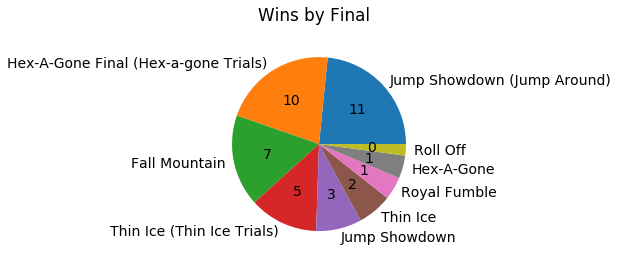

In [13]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        11
bronze        21
none           1
eliminated     9
Name: BadgeId, dtype: int64

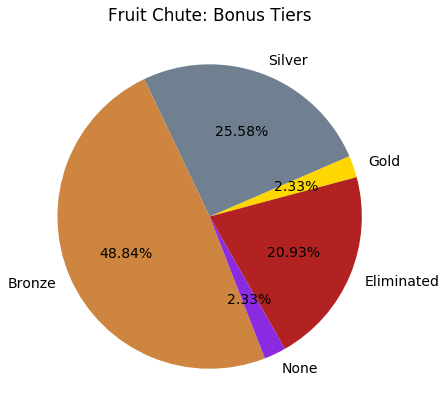

In [14]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                   17
event_only_hoverboard_0207_to_0507_2021     10
event_only_floor_fall_2302_to_2502_2021      5
event_only_thin_ice_1903_to_2203_2021        5
event_only_jump_club_2406_to_2706_2021       5
event_only_jump_club_1204_to_1404_2021       4
event_only_floor_fall_1203_to_1403_2021      2
event_only_floor_fall_0705_to_0905_2021      2
event_only_jump_club_0603_to_0803_2021       2
event_only_survival_0904_to_1104_2021        1
event_fanfare_2806_to_0107_2021              1
event_only_slime_climb_0504_to_0804_2021     1
event_only_thin_ice_2904_to_0205_2021        1
event_fan_favourites_1804_to_2004_2021       1
event_only_fall_ball_1005_to_1205_2021       1
event_only_floor_fall_0501_to_0701           1
Name: Game Mode, dtype: int64

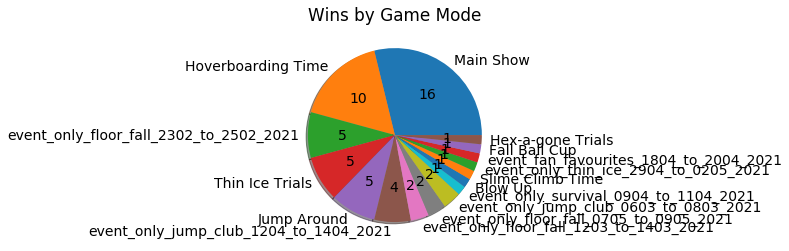

In [15]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [16]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                           247
squads_4player                                      238
squads_4player_2203_to_0404_2021                     71
event_only_thin_ice_1903_to_2203_2021                55
event_only_jump_club_2406_to_2706_2021               49
event_only_jump_club_1202_to_1402_2021               44
event_only_floor_fall_1203_to_1403_2021              37
event_only_floor_fall_0501_to_0701                   37
event_only_floor_fall_2302_to_2502_2021              32
event_only_jump_club_1204_to_1404_2021               27
event_only_thin_ice_2904_to_0205_2021                24
event_only_slime_climb_2_1706_to_2006_2021           24
event_only_survival_0904_to_1104_2021                22
event_only_floor_fall_0705_to_0905_2021              20
event_only_hoverboard_0207_to_0507_2021              16
event_fruit_basket_2106_to_2306_2021                 13
event_only_survival_1902_to_2202_2021                12
event_season_3_highlight_1512_to_1912           

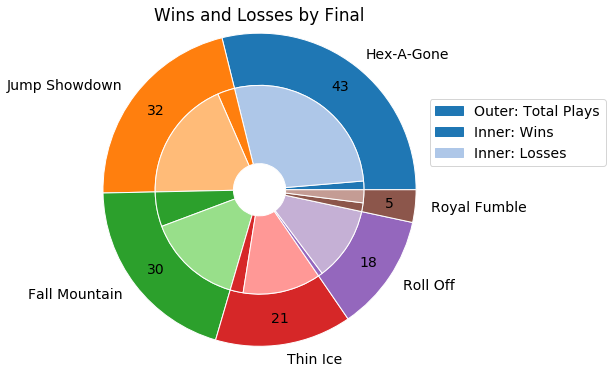

In [17]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,64,64,0
round_gauntlet_04,47,47,0
round_see_saw,44,44,0
round_gauntlet_01,43,41,2
round_gauntlet_05,35,35,0
round_gauntlet_02,32,31,1
round_door_dash,31,30,1
round_gauntlet_03,31,31,0
round_chompchomp,29,28,1
round_tunnel_race,22,21,1


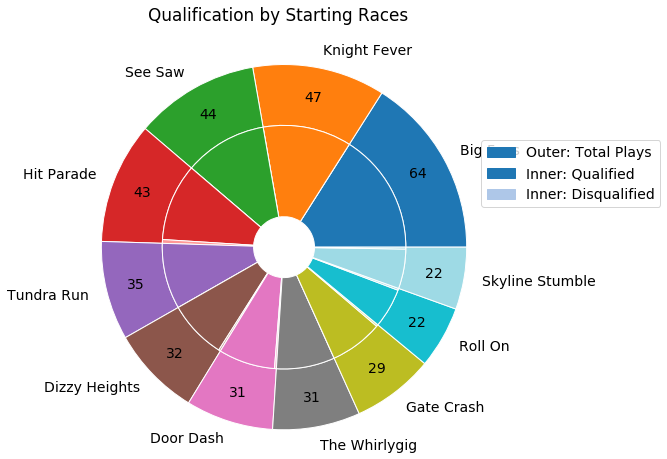

In [18]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

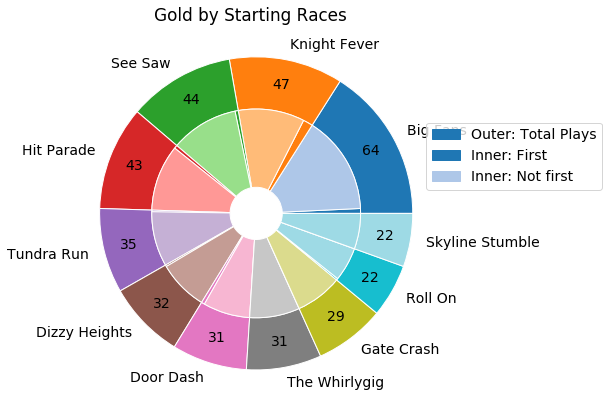

In [19]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

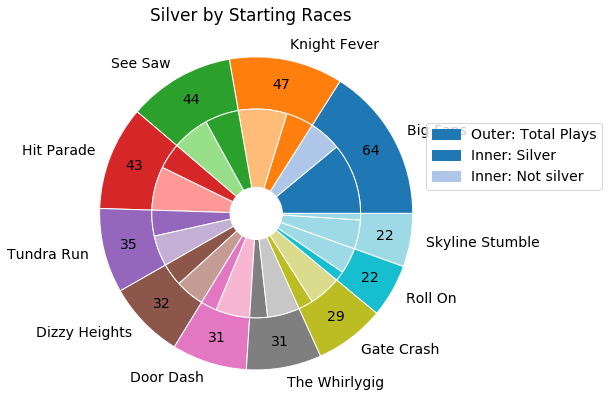

In [20]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

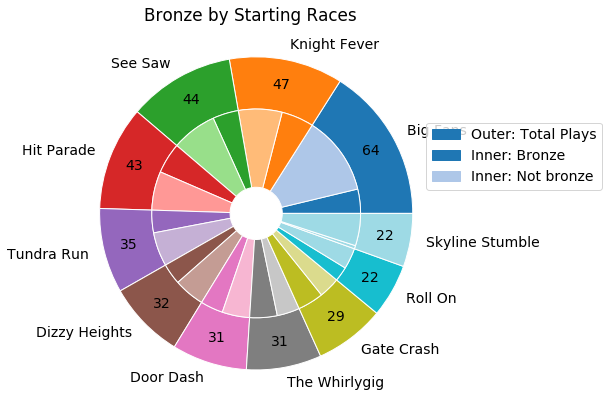

In [21]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);

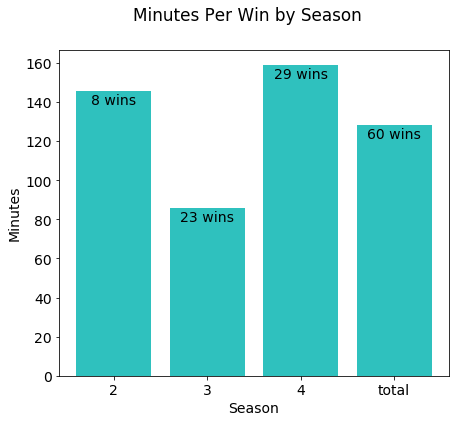

In [22]:
# Get a bar graph for average time per win by season and total
fgv.minutesPerWinBar(shows_info_df)

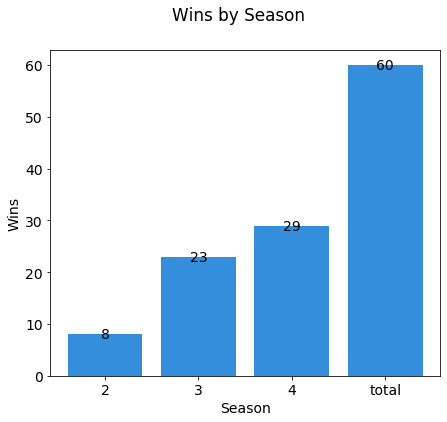

In [23]:
# Get a bar chart for wins by season
fgv.winsBySeasonBar(shows_info_df)

In [24]:
# Get win streaks (returns row ids for shows_df)
getStreaks(shows_df)

[[74, 75],
 [397, 398, 399],
 [680, 681],
 [1037, 1038, 1039],
 [1045, 1046, 1047, 1048, 1049, 1050]]

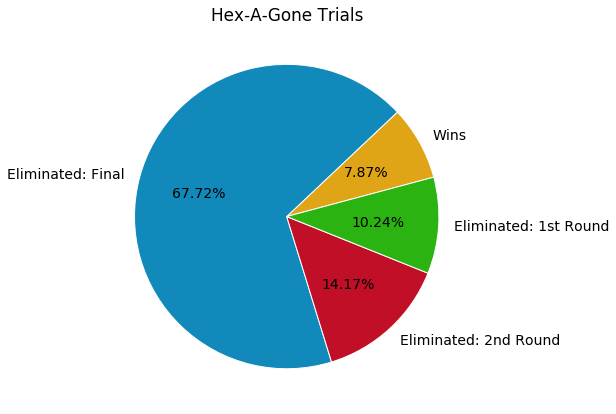

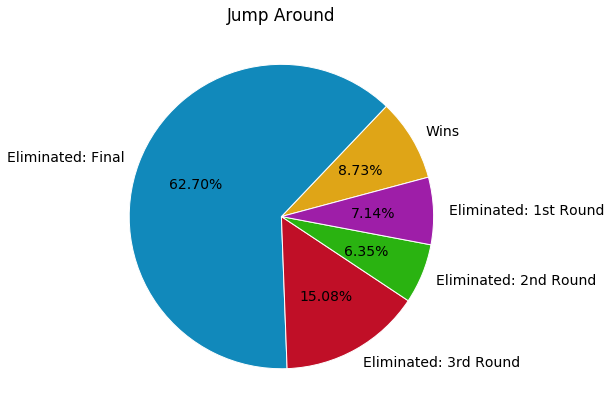

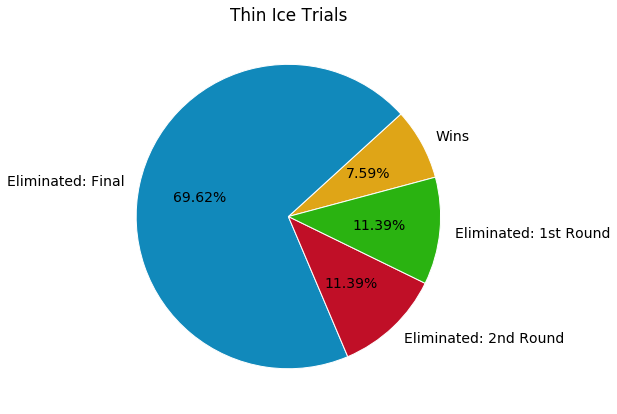

In [25]:
# Get a pie chart for success in playlists that are of the 'same' final
special_shows = ['event_only_floor_fall', 'event_only_jump_club', 'event_only_thin_ice']

for special_show in special_shows:
    fgv.specialShowsPie(special_show, shows_df, explode=False, percent=True)

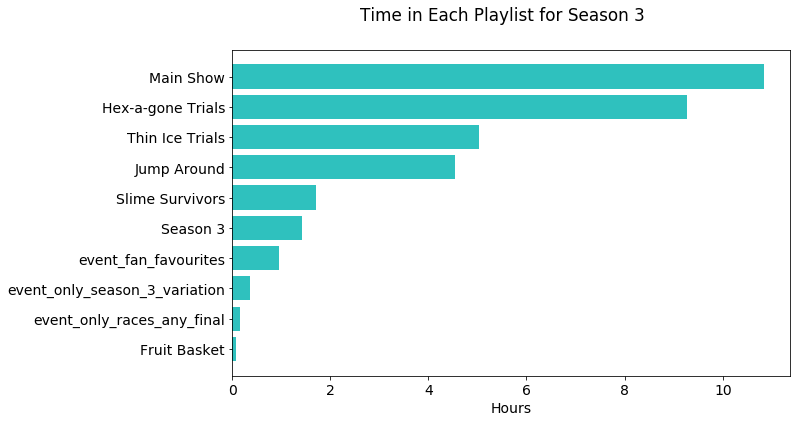

In [26]:
# Get a bar chart for playlist playtime for a season
fgv.seasonPlaylistTimeBar(shows_df, 3, True)

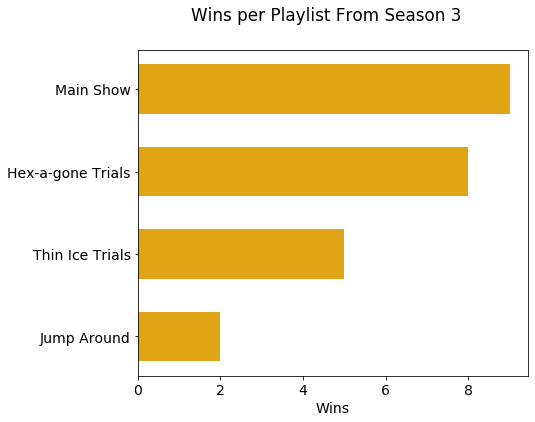

In [27]:
# Get a bar chart for wins per playlist from a season
fgv.seasonPlaylistWinsBar(shows_df, season=3)

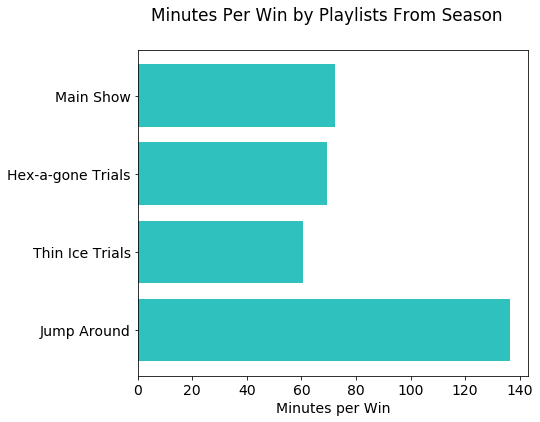

In [28]:
# Get a bar chart for minutes per win per playlist from a season
fgv.seasonPlaylistMinutesPerWinBar(shows_df, season=3)

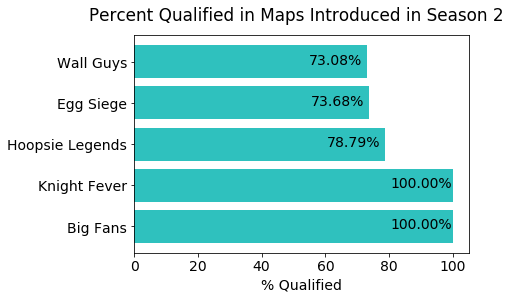

In [29]:
# Get a bar chart for percent qualified for maps introducted in a season
fgv.seasonMapsQualPercentBar(maps_df, season=2)

# side by side bars with attempts and times qualified?

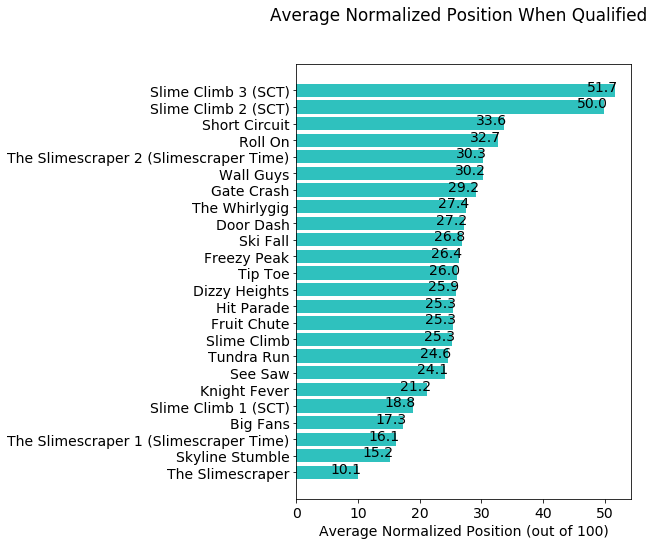

In [30]:
# Get a bar chart for average normalized position for race rounds when qualified
fgv.normalizedPositionRaceBar(maps_df)

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:431: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


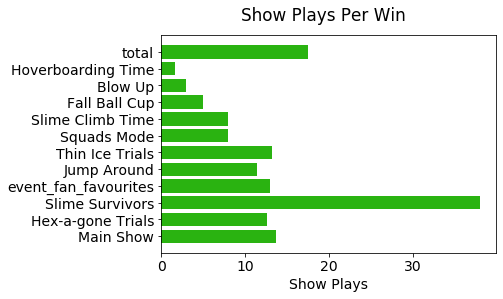

In [31]:
# Get a bar chart for plays per win for each playlist in a season (or overall)
fgv.playsPerWinPlaylistBar(shows_df, rounds_df, season=None, shorten=True)

0.46987951807228917

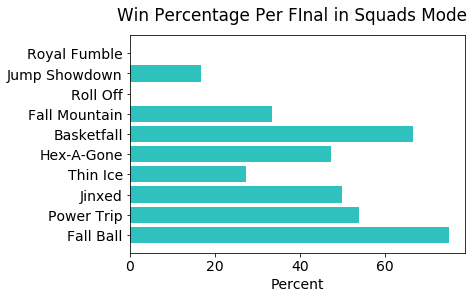

In [32]:
# Get a bar chart for win percentage in each final in Squads Mode
fgv.squadsFinalWinPercentBar(squad_shows_df, squad_rounds_df)

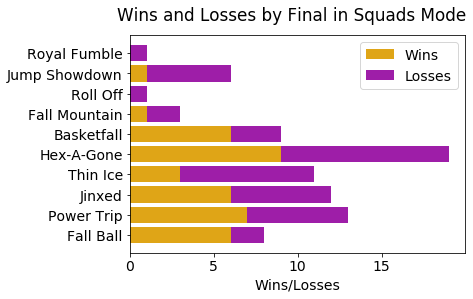

In [33]:
# Get a stacked bar plot for wins and fails per final in Squads Mode
fgv.squadsFinalStackedBar(squad_shows_df, squad_rounds_df)

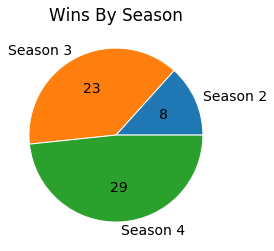

In [34]:
# Get a pie chart for normal wins by season
fgv.winsBySeasonPie(shows_df);

In [35]:
# Gets the top n times for a map
times = getTopTimes(rounds_df, shows_df, 'round_biggestfan', n=5)
times[['Time Spent', 'Show ID', 'Start Time', 'Season']]

,Time Spent,Show ID,Start Time,Season
0,55.290,113,2020-12-08 22:16:56.350000,2
1,55.319,633,2021-04-07 22:19:38.526000,4
2,55.339,115,2020-12-10 21:40:02.119000,2
3,56.420,103,2020-12-07 22:14:36.447000,2
4,61.155,35,2020-11-26 23:39:21.163000,2


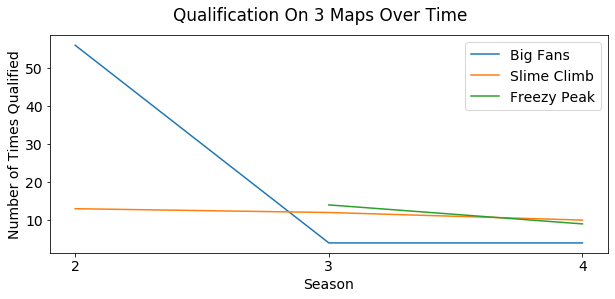

In [36]:
# Qualification percent by month
rounds = 'round_biggestfan'
rounds = ['round_biggestfan', 'round_lava', 'round_iceclimb']

# Get a line plot for performance on a map or list of maps over time
fgv.mapStatsOverTimeLine(rounds_df, shows_df, rounds, metric='qual', time_period='season', rotate=False)